**Q2**

Alireza Kheirandish

Student Number: 97101604

Source: https://github.com/ntrang086/image_captioning

In [1]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 21.03 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [2]:
%cd ./cocoapi/PythonAPI/
!ls
!make 
# !cd ..

/content/cocoapi/PythonAPI
Makefile  pycocoDemo.ipynb  pycocoEvalDemo.ipynb  pycocotools  setup.py
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.8/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.8/dist-packages/numpy/core/include -I../com

In [3]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip -q annotations_trainval2014.zip

--2023-02-05 06:44:01--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.8.150, 52.217.109.124, 54.231.202.9, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.8.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  77.2MB/s    in 3.1s    

2023-02-05 06:44:04 (77.2 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]



In [4]:
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip -q train2014.zip 

--2023-02-05 06:44:14--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.197.57, 52.217.223.1, 52.217.134.177, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.197.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  21.0MB/s    in 7m 24s  

2023-02-05 06:51:39 (29.0 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [5]:
!wget http://images.cocodataset.org/zips/val2014.zip
!unzip -q val2014.zip 
!wget http://images.cocodataset.org/zips/test2014.zip
!unzip -q test2014.zip 

--2023-02-05 06:53:25--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.62.225, 3.5.10.137, 54.231.73.11, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.62.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  59.5MB/s    in 2m 22s  

2023-02-05 06:55:48 (44.5 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]

--2023-02-05 06:56:41--  http://images.cocodataset.org/zips/test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.153.52, 52.217.168.49, 52.217.204.209, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.153.52|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6660437059 (6.2G) [application/zip]
Saving to: ‘test2014.zip’

test2014.zip        100%[===================>]   6.20G 

In [6]:
import os
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = ''
dataType = 'train2014'
instances_annFile = os.path.join(dataDir, '/content/cocoapi/PythonAPI/annotations/instances_train2014.json')
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, '/content/cocoapi/PythonAPI/annotations/captions_train2014.json')
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=12.98s)
creating index...
index created!
loading annotations into memory...
Done (t=0.89s)
creating index...
index created!


http://images.cocodataset.org/train2014/COCO_train2014_000000261118.jpg


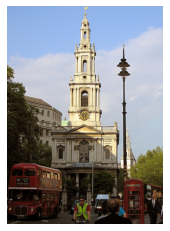

Church in city with people and double decker buses.
A white clock tower with a double decker bus on street.
A clock tower stands tall in a European square.
A large church tower in a busy city
This is a picture that was taken by someone on vacation.


In [7]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
import nltk
import pickle
import os.path
from pycocotools.coco import COCO
from collections import Counter

class Vocabulary(object):

    def __init__(self,
        vocab_threshold,
        vocab_file="./vocab.pkl",
        start_word="<start>",
        end_word="<end>",
        unk_word="<unk>",
        annotations_file="/content/cocoapi/PythonAPI/annotations/captions_train2014.json",
        vocab_from_file=False):
        """Initialize the vocabulary.
        Paramters:
          vocab_threshold: Minimum word count threshold.
          vocab_file: File containing the vocabulary.
          start_word: Special word denoting sentence start.
          end_word: Special word denoting sentence end.
          unk_word: Special word denoting unknown words.
          annotations_file: Path for train annotation file.
          vocab_from_file: If False, create vocab from scratch & override any
                           existing vocab_file. If True, load vocab from from
                           existing vocab_file, if it exists.
        """
        self.vocab_threshold = vocab_threshold
        self.vocab_file = vocab_file
        self.start_word = start_word
        self.end_word = end_word
        self.unk_word = unk_word
        self.annotations_file = annotations_file
        self.vocab_from_file = vocab_from_file
        self.get_vocab()

    def get_vocab(self):
        """Load the vocabulary from file or build it from scratch."""
        if os.path.exists(self.vocab_file) & self.vocab_from_file:
            with open(self.vocab_file, "rb") as f:
                vocab = pickle.load(f)
                self.word2idx = vocab.word2idx
                self.idx2word = vocab.idx2word
            print("Vocabulary successfully loaded from vocab.pkl file!")
        else:
            self.build_vocab()
            with open(self.vocab_file, "wb") as f:
                pickle.dump(self, f)
        
    def build_vocab(self):
        """Populate the dictionaries for converting tokens to integers 
        (and vice-versa)."""
        self.init_vocab()
        self.add_word(self.start_word)
        self.add_word(self.end_word)
        self.add_word(self.unk_word)
        self.add_captions()

    def init_vocab(self):
        """Initialize the dictionaries for converting tokens to integers
        (and vice-versa)."""
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        """Add a token to the vocabulary."""
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def add_captions(self):
        """Loop over training captions and add all tokens to the vocabulary 
        that meet or exceed the threshold."""
        coco = COCO(self.annotations_file)
        counter = Counter()
        ids = coco.anns.keys()
        for i, id in enumerate(ids):
            caption = str(coco.anns[id]["caption"])
            tokens = nltk.tokenize.word_tokenize(caption.lower())
            counter.update(tokens)

            if i % 100000 == 0:
                print("[%d/%d] Tokenizing captions..." % (i, len(ids)))

        words = [word for word, cnt in counter.items()
                 if cnt >= self.vocab_threshold]

        for i, word in enumerate(words):
            self.add_word(word)

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx[self.unk_word]
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [10]:
import nltk
import os
import torch
import torch.utils.data as data
from PIL import Image
from pycocotools.coco import COCO
import numpy as np
from tqdm import tqdm
import random
import json

def get_loader(transform,
               mode="train",
               batch_size=1,
               vocab_threshold=None,
               vocab_file="./vocab.pkl",
               start_word="<start>",
               end_word="<end>",
               unk_word="<unk>",
               vocab_from_file=True,
               num_workers=0,
               cocoapi_loc=""):
    """Return the data loader.
    Parameters:
        transform: Image transform.
        mode: One of "train", "val" or "test".
        batch_size: Batch size (if in testing mode, must have batch_size=1).
        vocab_threshold: Minimum word count threshold.
        vocab_file: File containing the vocabulary. 
        start_word: Special word denoting sentence start.
        end_word: Special word denoting sentence end.
        unk_word: Special word denoting unknown words.
        vocab_from_file: If False, create vocab from scratch & override any 
                         existing vocab_file. If True, load vocab from from
                         existing vocab_file, if it exists.
        num_workers: Number of subprocesses to use for data loading 
        cocoapi_loc: The location of the folder containing the COCO API: 
                     https://github.com/cocodataset/cocoapi
    """
    
    assert mode in ["train", "val", "test"], "mode must be one of 'train', 'val' or 'test'."
    if vocab_from_file == False: 
        assert mode == "train", "To generate vocab from captions file, \
               must be in training mode (mode='train')."

    # Based on mode (train, val, test), obtain img_folder and annotations_file
    if mode == "train":
        if vocab_from_file == True: 
            assert os.path.exists(vocab_file), "vocab_file does not exist.  \
                   Change vocab_from_file to False to create vocab_file."
        img_folder = os.path.join(cocoapi_loc, "/content/cocoapi/PythonAPI/train2014")
        annotations_file = os.path.join(cocoapi_loc, "/content/cocoapi/PythonAPI/annotations/captions_train2014.json")
    if mode == "val":
        assert os.path.exists(vocab_file), "Must first generate vocab.pkl from training data."
        assert vocab_from_file == True, "Change vocab_from_file to True."
        img_folder = os.path.join(cocoapi_loc, "/content/cocoapi/PythonAPI/val2014/")
        annotations_file = os.path.join(cocoapi_loc, "/content/cocoapi/PythonAPI/annotations/captions_val2014.json")
    if mode == "test":
        assert batch_size == 1, "Please change batch_size to 1 if testing your model."
        assert os.path.exists(vocab_file), "Must first generate vocab.pkl from training data."
        assert vocab_from_file == True, "Change vocab_from_file to True."
        img_folder = os.path.join(cocoapi_loc, "/content/cocoapi/PythonAPI/test2014/")
        annotations_file = os.path.join(cocoapi_loc, "cocoapi/annotations/image_info_test2014.json")

    # COCO caption dataset
    dataset = CoCoDataset(transform=transform,
                          mode=mode,
                          batch_size=batch_size,
                          vocab_threshold=vocab_threshold,
                          vocab_file=vocab_file,
                          start_word=start_word,
                          end_word=end_word,
                          unk_word=unk_word,
                          annotations_file=annotations_file,
                          vocab_from_file=vocab_from_file,
                          img_folder=img_folder)

    if mode == "train":
        # Randomly sample a caption length, and sample indices with that length.
        indices = dataset.get_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        initial_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        # data loader for COCO dataset.
        data_loader = data.DataLoader(dataset=dataset, 
                                      num_workers=num_workers,
                                      batch_sampler=data.sampler.BatchSampler(sampler=initial_sampler,
                                                                              batch_size=dataset.batch_size,
                                                                              drop_last=False))
    else:
        data_loader = data.DataLoader(dataset=dataset,
                                      batch_size=dataset.batch_size,
                                      shuffle=True,
                                      num_workers=num_workers)

    return data_loader

class CoCoDataset(data.Dataset):
    
    def __init__(self, transform, mode, batch_size, vocab_threshold, vocab_file, start_word, 
        end_word, unk_word, annotations_file, vocab_from_file, img_folder):
        self.transform = transform
        self.mode = mode
        self.batch_size = batch_size
        self.vocab = Vocabulary(vocab_threshold, vocab_file, start_word,
            end_word, unk_word, annotations_file, vocab_from_file)
        self.img_folder = img_folder
        if self.mode == "train" or self.mode == "val":
            self.coco = COCO(annotations_file)
            self.ids = list(self.coco.anns.keys())
            print("Obtaining caption lengths...")
            all_tokens = [nltk.tokenize.word_tokenize(
                          str(self.coco.anns[self.ids[index]]["caption"]).lower())
                            for index in tqdm(np.arange(len(self.ids)))]
            self.caption_lengths = [len(token) for token in all_tokens]
        # If in test mode
        else:
            test_info = json.loads(open(annotations_file).read())
            self.paths = [item["file_name"] for item in test_info["images"]]
        
    def __getitem__(self, index):
        # Obtain image and caption if in training or validation mode
        if self.mode == "train" or self.mode == "val":
            ann_id = self.ids[index]
            caption = self.coco.anns[ann_id]["caption"]
            img_id = self.coco.anns[ann_id]["image_id"]
            path = self.coco.loadImgs(img_id)[0]["file_name"]

            # Convert image to tensor and pre-process using transform
            image = Image.open(os.path.join(self.img_folder, path)).convert("RGB")
            image = self.transform(image)

            # Convert caption to tensor of word ids.
            tokens = nltk.tokenize.word_tokenize(str(caption).lower())
            caption = []
            caption.append(self.vocab(self.vocab.start_word))
            caption.extend([self.vocab(token) for token in tokens])
            caption.append(self.vocab(self.vocab.end_word))
            caption = torch.Tensor(caption).long()

            # Return pre-processed image and caption tensors
            return image, caption

        # Obtain image if in test mode
        else:
            path = self.paths[index]

            # Convert image to tensor and pre-process using transform
            PIL_image = Image.open(os.path.join(self.img_folder, path)).convert("RGB")
            orig_image = np.array(PIL_image)
            image = self.transform(PIL_image)

            # Return original image and pre-processed image tensor
            return orig_image, image

    def get_indices(self):
        sel_length = np.random.choice(self.caption_lengths)
        all_indices = np.where([self.caption_lengths[i] == \
                               sel_length for i in np.arange(len(self.caption_lengths))])[0]
        indices = list(np.random.choice(all_indices, size=self.batch_size))
        return indices

    def __len__(self):
        if self.mode == "train" or self.mode == "val":
            return len(self.ids)
        else:
            return len(self.paths)

In [11]:
nltk.download()
# popular

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> popular


       | 
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package gazetteers to /root/nltk_data...
       |   Unzipping corpora/gazetteers.zip.
       | Downloading package genesis to /root/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to /root/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package inaugural to /root/nltk_data...
       |   Unzipping corpora/inaugural.zip.
       | Downloading package movie_reviews to /root/nltk_data...
       |   Unzipping corpora/movie_reviews.zip.
       | Downloading package names to /root/nltk_data...
       |   Unzipping corpora/names.zip.
       | Downloading package shakespeare to /root/nltk_data...
       |   Unzipping corpora/shakespeare.zip.
       | Downloading package stopwords to /root/nltk_data...
       |   Unzipping corpora/stopwords.zip.
       | Downloading package treebank to /root/


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [12]:
import torch

from torchvision import transforms

# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Set the minimum word count threshold.
vocab_threshold = 5

# Specify the batch size.
batch_size = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:38<00:00, 10746.67it/s]


In [13]:
from collections import Counter

# Tally the total number of training captions with each length.
counter = Counter(data_loader.dataset.caption_lengths)
lengths = sorted(counter.items(), key=lambda pair: pair[1], reverse=True)
for value, count in lengths:
    print('value: %2d --- count: %5d' % (value, count))

value: 10 --- count: 86302
value: 11 --- count: 79971
value:  9 --- count: 71920
value: 12 --- count: 57653
value: 13 --- count: 37668
value: 14 --- count: 22342
value:  8 --- count: 20742
value: 15 --- count: 12839
value: 16 --- count:  7736
value: 17 --- count:  4845
value: 18 --- count:  3101
value: 19 --- count:  2017
value:  7 --- count:  1594
value: 20 --- count:  1453
value: 21 --- count:   997
value: 22 --- count:   684
value: 23 --- count:   533
value: 24 --- count:   384
value: 25 --- count:   277
value: 26 --- count:   214
value: 27 --- count:   160
value: 28 --- count:   114
value: 29 --- count:    87
value: 30 --- count:    58
value: 31 --- count:    49
value: 32 --- count:    44
value: 34 --- count:    40
value: 37 --- count:    32
value: 35 --- count:    31
value: 33 --- count:    30
value: 36 --- count:    26
value: 38 --- count:    18
value: 39 --- count:    18
value: 43 --- count:    16
value: 44 --- count:    16
value: 48 --- count:    12
value: 45 --- count:    11
v

In [14]:
import numpy as np
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = data_loader.dataset.get_indices()
print('{} sampled indices: {}'.format(len(indices), indices))
# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler

# Obtain the batch.
for batch in data_loader:
    images, captions = batch[0], batch[1]
    break
    
print('images.shape:', images.shape)
print('captions.shape:', captions.shape)


10 sampled indices: [244004, 193266, 139745, 166058, 189114, 325400, 169800, 138755, 9866, 6099]
images.shape: torch.Size([10, 3, 224, 224])
captions.shape: torch.Size([10, 13])


In [15]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn import functional as F


class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained ResNet-50 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet50(pretrained=True)
        modules = list(resnet.children())[:-1] 
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.resnet(images)
        features = features.view(features.size(0), -1)
        features = self.embed(features)
        features = self.bn(features)
        return features


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, features, captions):
        """Decode image feature vectors and generates captions."""
        captions = captions[:,:-1]
        embeddings = self.embed(captions)
        inputs = torch.cat((features.unsqueeze(1), embeddings), 1)
        hiddens, _ = self.lstm(inputs)
        outputs = self.linear(hiddens)
        return outputs

    def sample(self, inputs, states=None, max_len=20):
        """Accept a pre-processed image tensor (inputs) and return predicted 
        sentence (list of tensor ids of length max_len). This is the greedy
        search approach.
        """
        sampled_ids = []
        for i in range(max_len):
            hiddens, states = self.lstm(inputs, states)
            outputs = self.linear(hiddens.squeeze(1))
            # Get the index (in the vocabulary) of the most likely integer that
            # represents a word
            predicted = outputs.argmax(1)
            sampled_ids.append(predicted.item())
            inputs = self.embed(predicted)
            inputs = inputs.unsqueeze(1)
        return sampled_ids

    def sample_beam_search(self, inputs, states=None, max_len=20, beam_width=5):
        """Accept a pre-processed image tensor and return the top predicted 
        sentences. This is the beam search approach.
        """
        # Top word idx sequences and their corresponding inputs and states
        idx_sequences = [[[], 0.0, inputs, states]]
        for _ in range(max_len):
            # Store all the potential candidates at each step
            all_candidates = []
            # Predict the next word idx for each of the top sequences
            for idx_seq in idx_sequences:
                hiddens, states = self.lstm(idx_seq[2], idx_seq[3])
                outputs = self.linear(hiddens.squeeze(1))
                # Transform outputs to log probabilities to avoid floating-point 
                # underflow caused by multiplying very small probabilities
                log_probs = F.log_softmax(outputs, -1)
                top_log_probs, top_idx = log_probs.topk(beam_width, 1)
                top_idx = top_idx.squeeze(0)
                # create a new set of top sentences for next round
                for i in range(beam_width):
                    next_idx_seq, log_prob = idx_seq[0][:], idx_seq[1]
                    next_idx_seq.append(top_idx[i].item())
                    log_prob += top_log_probs[0][i].item()
                    # Indexing 1-dimensional top_idx gives 0-dimensional tensors.
                    # We have to expand dimensions before embedding them
                    inputs = self.embed(top_idx[i].unsqueeze(0)).unsqueeze(0)
                    all_candidates.append([next_idx_seq, log_prob, inputs, states])
            # Keep only the top sequences according to their total log probability
            ordered = sorted(all_candidates, key=lambda x: x[1], reverse=True)
            idx_sequences = ordered[:beam_width]
        return [idx_seq[0] for idx_seq in idx_sequences]

In [16]:
embed_size = 256

# Initialize the encoder. (We can add additional arguments if necessary.)
encoder = EncoderCNN(embed_size)

# Move the encoder to GPU if CUDA is available.
if torch.cuda.is_available():
    encoder = encoder.cuda()
    
# Move the last batch of images from Step 2 to GPU if CUDA is available
if torch.cuda.is_available():
    images = images.cuda()
# Pass the images through the encoder.
features = encoder(images)

print('type(features):', type(features))
print('features.shape:', features.shape)

# Check that our encoder satisfies some requirements of the project!
assert (features.shape[0]==batch_size) & (features.shape[1]==embed_size), "The shape of the encoder output is incorrect."

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

type(features): <class 'torch.Tensor'>
features.shape: torch.Size([10, 256])


In [17]:
# Specify the number of features in the hidden state of the RNN decoder.
hidden_size = 512

# Store the size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the decoder.
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
# Move the decoder to GPU if CUDA is available.
if torch.cuda.is_available():
    decoder = decoder.cuda()
    
# Move the last batch of captions (from Step 1) to GPU if cuda is availble 
if torch.cuda.is_available():
    captions = captions.cuda()
# Pass the encoder output and captions through the decoder
outputs = decoder(features, captions)

print('type(outputs):', type(outputs))
print('outputs.shape:', outputs.shape)

# Check that our decoder satisfies some requirements of the project!
assert (outputs.shape[0]==batch_size) & (outputs.shape[1]==captions.shape[1]) & (outputs.shape[2]==vocab_size), "The shape of the decoder output is incorrect."

type(outputs): <class 'torch.Tensor'>
outputs.shape: torch.Size([10, 13, 8852])


In [18]:
import torch
import torch.utils.data as data
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import time
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Determine how often to print the batch loss while training/validating. 
# We set this at `100` to avoid clogging the notebook.
PRINT_EVERY = 100

def train(train_loader, encoder, decoder, criterion, optimizer, vocab_size,
          epoch, total_step, start_step=1, start_loss=0.0):
    """Train the model for one epoch using the provided parameters. Save 
    checkpoints every 100 steps. Return the epoch's average train loss."""

    # Switch to train mode
    encoder.train()
    decoder.train()

    # Keep track of train loss
    total_loss = start_loss

    # Start time for every 100 steps
    start_train_time = time.time()

    for i_step in range(start_step, total_step + 1):
        # Randomly sample a caption length, and sample indices with that length
        indices = train_loader.dataset.get_indices()
        # Create a batch sampler to retrieve a batch with the sampled indices
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        train_loader.batch_sampler.sampler = new_sampler

        # Obtain the batch
        for batch in train_loader:
            images, captions = batch[0], batch[1]
            break 
        # Move to GPU if CUDA is available
        if torch.cuda.is_available():
            images = images.cuda()
            captions = captions.cuda()
        # Pass the inputs through the CNN-RNN model
        features = encoder(images)
        outputs = decoder(features, captions)

        # Calculate the batch loss
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        # Zero the gradients. Since the backward() function accumulates 
        # gradients, and we don’t want to mix up gradients between minibatches,
        # we have to zero them out at the start of a new minibatch
        optimizer.zero_grad()
        # Backward pass to calculate the weight gradients
        loss.backward()
        # Update the parameters in the optimizer
        optimizer.step()

        total_loss += loss.item()

        # Get training statistics
        stats = "Epoch %d, Train step [%d/%d], %ds, Loss: %.4f, Perplexity: %5.4f" \
                % (epoch, i_step, total_step, time.time() - start_train_time,
                   loss.item(), np.exp(loss.item()))
        # Print training statistics (on same line)
        print("\r" + stats, end="")
        sys.stdout.flush()

        # Print training stats (on different line), reset time and save checkpoint
        if i_step % PRINT_EVERY == 0:
            print("\r" + stats)
            filename = os.path.join("", "train-model-{}{}.pkl".format(epoch, i_step))
            save_checkpoint(filename, encoder, decoder, optimizer, total_loss, epoch, i_step)
            start_train_time = time.time()
            
    return total_loss / total_step
            
def validate(val_loader, encoder, decoder, criterion, vocab, epoch, 
             total_step, start_step=1, start_loss=0.0, start_bleu=0.0):
    """Validate the model for one epoch using the provided parameters. 
    Return the epoch's average validation loss and Bleu-4 score."""

    # Switch to validation mode
    encoder.eval()
    decoder.eval()

    # Initialize smoothing function
    smoothing = SmoothingFunction()

    # Keep track of validation loss and Bleu-4 score
    total_loss = start_loss
    total_bleu_4 = start_bleu

    # Start time for every 100 steps
    start_val_time = time.time()

    # Disable gradient calculation because we are in inference mode
    with torch.no_grad():
        for i_step in range(start_step, total_step + 1):
            # Randomly sample a caption length, and sample indices with that length
            indices = val_loader.dataset.get_indices()
            # Create a batch sampler to retrieve a batch with the sampled indices
            new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
            val_loader.batch_sampler.sampler = new_sampler

            # Obtain the batch
            for batch in val_loader:
                images, captions = batch[0], batch[1]
                break 

            # Move to GPU if CUDA is available
            if torch.cuda.is_available():
                images = images.cuda()
                captions = captions.cuda()
            
            # Pass the inputs through the CNN-RNN model
            features = encoder(images)
            outputs = decoder(features, captions)

            # Calculate the total Bleu-4 score for the batch
            batch_bleu_4 = 0.0
            # Iterate over outputs. Note: outputs[i] is a caption in the batch
            # outputs[i, j, k] contains the model's predicted score i.e. how 
            # likely the j-th token in the i-th caption in the batch is the 
            # k-th token in the vocabulary.
            for i in range(len(outputs)):
                predicted_ids = []
                for scores in outputs[i]:
                    # Find the index of the token that has the max score
                    predicted_ids.append(scores.argmax().item())
                # Convert word ids to actual words
                predicted_word_list = word_list(predicted_ids, vocab)
                caption_word_list = word_list(captions[i].numpy(), vocab)
                # Calculate Bleu-4 score and append it to the batch_bleu_4 list
                batch_bleu_4 += sentence_bleu([caption_word_list], 
                                               predicted_word_list, 
                                               smoothing_function=smoothing.method1)
            total_bleu_4 += batch_bleu_4 / len(outputs)

            # Calculate the batch loss
            loss = criterion(outputs.view(-1, len(vocab)), captions.view(-1))
            total_loss += loss.item()
            
            # Get validation statistics
            stats = "Epoch %d, Val step [%d/%d], %ds, Loss: %.4f, Perplexity: %5.4f, Bleu-4: %.4f" \
                    % (epoch, i_step, total_step, time.time() - start_val_time,
                       loss.item(), np.exp(loss.item()), batch_bleu_4 / len(outputs))

            # Print validation statistics (on same line)
            print("\r" + stats, end="")
            sys.stdout.flush()

            # Print validation statistics (on different line) and reset time
            if i_step % PRINT_EVERY == 0:
                print("\r" + stats)
                filename = os.path.join("", "val-model-{}{}.pkl".format(epoch, i_step))
                save_val_checkpoint(filename, encoder, decoder, total_loss, total_bleu_4, epoch, i_step)
                start_val_time = time.time()
                
        return total_loss / total_step, total_bleu_4 / total_step

def save_checkpoint(filename, encoder, decoder, optimizer, total_loss, epoch, train_step=1):
    """Save the following to filename at checkpoints: encoder, decoder,
    optimizer, total_loss, epoch, and train_step."""
    torch.save({"encoder": encoder.state_dict(),
                "decoder": decoder.state_dict(),
                "optimizer" : optimizer.state_dict(),
                "total_loss": total_loss,
                "epoch": epoch,
                "train_step": train_step,
               }, filename)

def save_val_checkpoint(filename, encoder, decoder, total_loss,
    total_bleu_4, epoch, val_step=1):
    """Save the following to filename at checkpoints: encoder, decoder,
    total_loss, total_bleu_4, epoch, and val_step"""
    torch.save({"encoder": encoder.state_dict(),
                "decoder": decoder.state_dict(),
                "total_loss": total_loss,
                "total_bleu_4": total_bleu_4,
                "epoch": epoch,
                "val_step": val_step,
               }, filename)

def save_epoch(filename, encoder, decoder, optimizer, train_losses, val_losses, 
               val_bleu, val_bleus, epoch):
    """Save at the end of an epoch. Save the model's weights along with the 
    entire history of train and validation losses and validation bleus up to 
    now, and the best Bleu-4."""
    torch.save({"encoder": encoder.state_dict(),
                "decoder": decoder.state_dict(),
                "optimizer": optimizer.state_dict(),
                "train_losses": train_losses,
                "val_losses": val_losses,
                "val_bleu": val_bleu,
                "val_bleus": val_bleus,
                "epoch": epoch
               }, filename)

def early_stopping(val_bleus, patience=3):
    """Check if the validation Bleu-4 scores no longer improve for 3 
    (or a specified number of) consecutive epochs."""
    # The number of epochs should be at least patience before checking
    # for convergence
    if patience > len(val_bleus):
        return False
    latest_bleus = val_bleus[-patience:]
    # If all the latest Bleu scores are the same, return True
    if len(set(latest_bleus)) == 1:
        return True
    max_bleu = max(val_bleus)
    if max_bleu in latest_bleus:
        # If one of recent Bleu scores improves, not yet converged
        if max_bleu not in val_bleus[:len(val_bleus) - patience]:
            return False
        else:
            return True
    # If none of recent Bleu scores is greater than max_bleu, it has converged
    return True

def word_list(word_idx_list, vocab):
    """Take a list of word ids and a vocabulary from a dataset as inputs
    and return the corresponding words as a list.
    """
    word_list = []
    for i in range(len(word_idx_list)):
        vocab_id = word_idx_list[i]
        word = vocab.idx2word[vocab_id]
        if word == vocab.end_word:
            break
        if word != vocab.start_word:
            word_list.append(word)
    return word_list

def clean_sentence(word_idx_list, vocab):
    """Take a list of word ids and a vocabulary from a dataset as inputs
    and return the corresponding sentence (as a single Python string).
    """
    sentence = []
    for i in range(len(word_idx_list)):
        vocab_id = word_idx_list[i]
        word = vocab.idx2word[vocab_id]
        if word == vocab.end_word:
            break
        if word != vocab.start_word:
            sentence.append(word)
    sentence = " ".join(sentence)
    return sentence

def get_prediction(data_loader, encoder, decoder, vocab):
    """Loop over images in a dataset and print model's top three predicted 
    captions using beam search."""
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title("Sample Image")
    plt.show()
    if torch.cuda.is_available():
        image = image.cuda()
    features = encoder(image).unsqueeze(1)
    print ("Caption without beam search:")
    output = decoder.sample(features)
    sentence = clean_sentence(output, vocab)
    print (sentence)

    print ("Top captions using beam search:")
    outputs = decoder.sample_beam_search(features)
    # Print maximum the top 3 predictions
    num_sents = min(len(outputs), 3)
    for output in outputs[:num_sents]:
        sentence = clean_sentence(output, vocab)
        print (sentence)

In [25]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms
import sys
from pycocotools.coco import COCO
import math
import torch.utils.data as data
import numpy as np
import os
import requests
import time


# Set values for the training variables
batch_size = 128         # batch size
vocab_threshold = 5     # minimum word count threshold
vocab_from_file = True  # if True, load existing vocab file
embed_size = 256        # dimensionality of image and word embeddings
hidden_size = 512       # number of features in hidden state of the RNN decoder
num_epochs = 1          # number of training epochs

In [26]:
# Define a transform to pre-process the training images
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Define a transform to pre-process the validation images
transform_val = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.CenterCrop(224),                      # get 224x224 crop from the center
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

In [27]:
# Build data loader, applying the transforms
train_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)
val_loader = get_loader(transform=transform_val,
                         mode='val',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)


# The size of the vocabulary
vocab_size = len(train_loader.dataset.vocab)

# Initialize the encoder and decoder
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available
if torch.cuda.is_available():
    encoder.cuda()
    decoder.cuda()

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.90s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:40<00:00, 10337.53it/s]


Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.41s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 202654/202654 [00:18<00:00, 10855.73it/s]


In [28]:
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# Specify the learnable parameters of the model
params = list(decoder.parameters()) + list(encoder.embed.parameters()) + list(encoder.bn.parameters())

# Define the optimizer
optimizer = torch.optim.Adam(params=params, lr=0.001)

In [29]:

# Set the total number of training and validation steps per epoch
total_train_step = math.ceil(len(train_loader.dataset.caption_lengths) / train_loader.batch_sampler.batch_size)
total_val_step = math.ceil(len(val_loader.dataset.caption_lengths) / val_loader.batch_sampler.batch_size)
print ("Number of training steps:", total_train_step)
print ("Number of validation steps:", total_val_step)

Number of training steps: 3236
Number of validation steps: 1584


In [ ]:
# Keep track of train and validation losses and validation Bleu-4 scores by epoch
train_losses = []
val_losses = []
val_bleus = []
# Keep track of the current best validation Bleu score
best_val_bleu = float("-INF")

start_time = time.time()
for epoch in range(1, num_epochs + 1):
    train_loss = train(train_loader, encoder, decoder, criterion, optimizer, 
                       vocab_size, epoch, total_train_step)
    train_losses.append(train_loss)
    val_loss, val_bleu = validate(val_loader, encoder, decoder, criterion,
                                  train_loader.dataset.vocab, epoch, total_val_step)
    val_losses.append(val_loss)
    val_bleus.append(val_bleu)
    if val_bleu > best_val_bleu:
        print ("Validation Bleu-4 improved from {:0.4f} to {:0.4f}, saving model to best-model.pkl".
               format(best_val_bleu, val_bleu))
        best_val_bleu = val_bleu
        filename = os.path.join("", "best-model.pkl")
        save_epoch(filename, encoder, decoder, optimizer, train_losses, val_losses, 
                   val_bleu, val_bleus, epoch)
    else:
        print ("Validation Bleu-4 did not improve, saving model to model-{}.pkl".format(epoch))
    # Save the entire model anyway, regardless of being the best model so far or not
    filename = os.path.join("", "model-{}.pkl".format(epoch))
    save_epoch(filename, encoder, decoder, optimizer, train_losses, val_losses, 
               val_bleu, val_bleus, epoch)
    print ("Epoch [%d/%d] took %ds" % (epoch, num_epochs, time.time() - start_time))
    if epoch > 5:
        # Stop if the validation Bleu doesn't improve for 3 epochs
        if early_stopping(val_bleus, 3):
            break
    start_time = time.time()

Epoch 1, Train step [100/3236], 203s, Loss: 3.6817, Perplexity: 39.7119
Epoch 1, Train step [200/3236], 201s, Loss: 3.7351, Perplexity: 41.8934
Epoch 1, Train step [300/3236], 201s, Loss: 3.6841, Perplexity: 39.8074
Epoch 1, Train step [400/3236], 202s, Loss: 2.9577, Perplexity: 19.2540
Epoch 1, Train step [500/3236], 201s, Loss: 3.2044, Perplexity: 24.6410
Epoch 1, Train step [600/3236], 200s, Loss: 2.7175, Perplexity: 15.1419
Epoch 1, Train step [700/3236], 199s, Loss: 2.6333, Perplexity: 13.9196
Epoch 1, Train step [800/3236], 199s, Loss: 2.4604, Perplexity: 11.7091
Epoch 1, Train step [900/3236], 201s, Loss: 2.6962, Perplexity: 14.8237
Epoch 1, Train step [1000/3236], 204s, Loss: 2.5166, Perplexity: 12.3867
Epoch 1, Train step [1100/3236], 202s, Loss: 2.3905, Perplexity: 10.9189
Epoch 1, Train step [1200/3236], 203s, Loss: 2.3523, Perplexity: 10.5099
Epoch 1, Train step [1300/3236], 203s, Loss: 2.3533, Perplexity: 10.5201
Epoch 1, Train step [1400/3236], 202s, Loss: 2.4654, Perplex

In [ ]:
# Load checkpoints
train_checkpoint = torch.load(os.path.join('', 'train-model-712900.pkl'))
epoch_checkpoint = torch.load(os.path.join('', 'model-6.pkl'))
best_checkpoint = torch.load(os.path.join('', 'best-model.pkl'))

# Load the pre-trained weights and epoch from the last train step
encoder.load_state_dict(train_checkpoint['encoder'])
decoder.load_state_dict(train_checkpoint['decoder'])
optimizer.load_state_dict(train_checkpoint['optimizer'])
epoch = train_checkpoint['epoch']

# Load from the previous epoch
train_losses = epoch_checkpoint['train_losses']
val_losses = epoch_checkpoint['val_losses']
val_bleus = epoch_checkpoint['val_bleus']

# Load from the best model
best_val_bleu = best_checkpoint['val_bleu']

train_losses.append(train_loss)
print (train_losses, val_losses, val_bleus, best_val_bleu)
print ("Training completed for epoch {}, saving model to train-model-{}.pkl".format(epoch, epoch))
filename = os.path.join("", "train-model-{}.pkl".format(epoch))
save_epoch(filename, encoder, decoder, optimizer, train_losses, val_losses, 
           best_val_bleu, val_bleus, epoch)

In [ ]:
# Load the last checkpoint
checkpoint = torch.load(os.path.join('', 'val-model-75500.pkl'))

# Load the pre-trained weights
encoder.load_state_dict(checkpoint['encoder'])
decoder.load_state_dict(checkpoint['decoder'])

# Load these from checkpoint if in the middle of validation process; otherwise, comment them out
start_loss = checkpoint['total_loss']
start_bleu = checkpoint['total_bleu_4']
# Reset these to 0.0 if starting validation for an epoch; otherwise comment them out
#start_loss = 0.0
#start_bleu = 0.0

# Load epoch
epoch = checkpoint['epoch']
# Load start_step from checkpoint if in the middle of training process; otherwise, comment it out
start_step = checkpoint['val_step'] + 1
# Reset start_step to 1 if starting a new epoch; otherwise comment it out
#start_step = 1

# Validate 1 epoch at a time due to very long validation time
val_loss, val_bleu = validate(val_loader, encoder, decoder, criterion, 
                              train_loader.dataset.vocab, epoch, total_val_step, 
                              start_step, start_loss, start_bleu)

In [ ]:
# Load checkpoints
checkpoint = torch.load(os.path.join('', 'train-model-7.pkl'))
best_checkpoint = torch.load(os.path.join('', 'best-model.pkl'))

# Load the pre-trained weights
encoder.load_state_dict(checkpoint['encoder'])
decoder.load_state_dict(checkpoint['decoder'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Load train and validation losses and validation Bleu-4 scores 
train_losses = checkpoint['train_losses']
val_losses = checkpoint['val_losses']
val_bleus = checkpoint['val_bleus']
best_val_bleu = best_checkpoint['val_bleu']

# Load epoch
epoch = checkpoint['epoch']    

val_losses.append(val_loss)
val_bleus.append(val_bleu)
print (train_losses, val_losses, val_bleus, best_val_bleu)

if val_bleu > best_val_bleu:
    print ("Validation Bleu-4 improved from {:0.4f} to {:0.4f}, saving model to best-model.pkl".
           format(best_val_bleu, val_bleu))
    best_val_bleu = val_bleu
    print (best_val_bleu)
    filename = os.path.join("", "best-model.pkl")
    save_epoch(filename, encoder, decoder, optimizer, train_losses, val_losses, 
               val_bleu, val_bleus, epoch)
else:
    print ("Validation Bleu-4 did not improve, saving model to model-{}.pkl".format(epoch))
# Save the entire model anyway, regardless of being the best model so far or not
filename = os.path.join("", "model-{}.pkl".format(epoch))
save_epoch(filename, encoder, decoder, optimizer, train_losses, val_losses, 
           val_bleu, val_bleus, epoch)
if epoch > 5:
    # Stop if the validation Bleu doesn't improve for 3 epochs
    if early_stopping(val_bleus, 3):
        print ("Val Bleu-4 doesn't improve anymore. Early stopping")

In [ ]:
# Define a transform to pre-process the testing images
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.CenterCrop(224),                      # get 224x224 crop from the center
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Create the data loader
data_loader = get_loader(transform=transform_test,    
                         mode='test')

In [ ]:
# Obtain sample image before and after pre-processing
orig_image, image = next(iter(data_loader))
# Convert image from torch.FloatTensor to numpy ndarray
transformed_image = image.numpy()
# Remove the first dimension which is batch_size euqal to 1
transformed_image = np.squeeze(transformed_image)
transformed_image = transformed_image.transpose((1, 2, 0))

# Visualize sample image, before pre-processing
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()
# Visualize sample image, after pre-processing
plt.imshow(transformed_image)
plt.title('transformed image')
plt.show()

In [ ]:
checkpoint = torch.load(os.path.join('./models', 'model-7.pkl'))

# Specify values for embed_size and hidden_size - we use the same values as in training step
embed_size = 256
hidden_size = 512

# Get the vocabulary and its size
vocab = data_loader.dataset.vocab
vocab_size = len(vocab)

# Initialize the encoder and decoder, and set each to inference mode
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the pre-trained weights
encoder.load_state_dict(checkpoint['encoder'])
decoder.load_state_dict(checkpoint['decoder'])

# Move models to GPU if CUDA is available.
if torch.cuda.is_available():
    encoder.cuda()
    decoder.cuda()

In [ ]:
# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

In [ ]:
sentence = clean_sentence(output, vocab)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

In [ ]:
get_prediction(data_loader, encoder, decoder, vocab)